# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/blastchar/telco-customer-churn

   Deskripsi Dataset: Dataset ini merupakan data Customer Churn yang berisi informasi profil pelanggan dari sebuah perusahaan layanan. Data ini mencakup berbagai fitur seperti demografi pelanggan, durasi kontrak, metode pembayaran, serta total tagihan. Tujuan utama dari penggunaan dataset ini adalah untuk membangun model prediksi yang dapat mengidentifikasi apakah seorang pelanggan akan berhenti menggunakan layanan (churn) atau tetap berlangganan (retain) berdasarkan perilaku dan karakteristik yang terekam.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
dataset_url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(dataset_url)
print("Lima baris pertama dataset:")
display(df.head())
print(f"\nUkuran dataset: {df.shape[0]} baris dan {df.shape[1]} kolom")

Lima baris pertama dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Ukuran dataset: 7043 baris dan 21 kolom


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

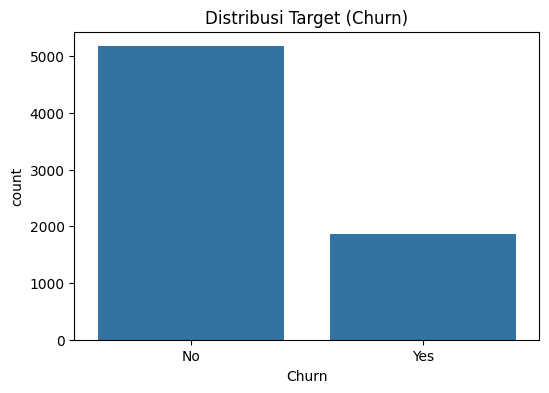


--- Statistik Deskriptif ---


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
print("--- Informasi Dataset ---")
df.info()

print("\n--- Jumlah Missing Values ---")
print(df.isnull().sum())
print(f"\nJumlah Duplikasi: {df.duplicated().sum()}")

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Target (Churn)')
plt.show()

print("\n--- Statistik Deskriptif ---")
display(df.describe())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# --- STEP 1: Membersihkan Data ---

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Gunakan errors='ignore' agar tidak error saat sel dijalankan ulang
df.drop(columns=['customerID'], inplace=True, errors='ignore')

# --- STEP 2: Encoding (Mengubah Kategori jadi Angka) ---

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df = pd.get_dummies(df, drop_first=True)
print("Ukuran dataset setelah encoding:", df.shape)

# --- STEP 3: Splitting Data (Train-Test Split) ---

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

# --- STEP 4: Scaling (Standarisasi) ---

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_clean = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_clean = pd.DataFrame(X_test_scaled, columns=X.columns)

train_set = pd.concat([X_train_clean, y_train.reset_index(drop=True)], axis=1)
test_set = pd.concat([X_test_clean, y_test.reset_index(drop=True)], axis=1)

print("\n--- Contoh Data Bersih (Siap Latih) ---")
display(train_set.head())

# --- STEP 5: Simpan Hasil (Versi Tunggal) ---
df_clean = pd.concat([X_train_clean, y_train.reset_index(drop=True)], axis=1)

df_clean.to_csv('churn_clean.csv', index=False)
print("\n[SUCCESS] File churn_clean.csv telah disimpan!")

Ukuran dataset setelah encoding: (7043, 31)
Jumlah data training: 5634
Jumlah data testing: 1409

--- Contoh Data Bersih (Siap Latih) ---


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.437749,-0.465683,-0.000474,-0.421345,-1.025166,-0.969579,1.532186,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,1.250762,1.910109,-0.558353,-1.200007,-0.527656,-0.709650,1.84247,0
1,-0.437749,0.885537,1.074754,1.255888,-1.025166,-0.969579,-0.652662,0.329573,-0.329573,1.162083,...,1.258260,-0.524081,1.250762,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275,0
2,-0.437749,-1.284605,-1.376499,-1.002151,0.975452,1.031376,-0.652662,-3.034225,3.034225,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
3,-0.437749,-1.161766,0.177346,-0.907292,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
4,-0.437749,-1.325551,-0.098524,-0.394513,0.975452,-0.969579,1.532186,0.329573,-0.329573,1.162083,...,-0.794748,-0.524081,-0.799513,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275,0



[SUCCESS] File train.csv dan test.csv telah disimpan!
